
# [KDT] ch7 Unsupervised Learning

### Clustering / PCA / Association Rule 

 - 데이터셋: 직장인 연봉 정보 / 보스톤 집값 / 식료품 정보 데이터셋 
 - 주요 라이브러리: sklearn linear_model / sklearn.decomposition / mlxtend.preprocessing 
 - 알파 퀴즈(1개) / 파이 퀴즈(1개) / 시그마 퀴즈(2개) / 오메가 퀴즈(과제 1개) 

In [1]:
import os
os.getcwd()

'C:\\Users\\하정수\\TIL\\Machine Learning'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# 원본 파일 로딩 
df_hk = pd.read_csv('.\\data\\hk_221206.csv')

## $\alpha$(알파) 퀴즈:

직장인 연봉 정보 데이터셋을 바탕으로 군집분석을 진행하고자 한다.
<br> 군집분석 진행 전 워밍업으로 지표간 거리 구하기 문제를 풀어 보고자 한다.

<br>p(x1, y1), q(x2, y2) 일때 上) 맨허튼 거리, 下) 유클리드 거리 수식은 아래와 같다

 $$d\left( p,q\right)   = |x_{1}-x_{2}| + |y_{1}-y_{2}| $$

$$d\left( p,q\right)   = \sqrt {  \left( x_{1}-x_{2}\right)^2 + \left( y_{1}-y_{2}\right)^2} $$

In [5]:
df_hk[:5]

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure
0,hkd1,990623-2,F,161.9,22,A,A,A,4100,1975
1,hkd10,900303-2,F,169.4,31,A,A,B,4720,2970
2,hkd100,681205-2,F,168.3,55,A,A,B,7280,5905
3,hkd101,931226-2,F,155.3,28,AB,B,B,4060,2935
4,hkd102,920123-1,M,188.6,29,O,B,F,4390,4015


In [6]:
#첫번째 데이터인 hkd1 의 정보값
y1, x1 = df_hk.iloc[0, 8:10]
x1, y1

(1975, 4100)

In [7]:
#두번째 데이터인 hkd10 의 정보값
y2, x2 = df_hk.iloc[1, 8:10]
x2, y2

(2970, 4720)

<b>quiz1)</b> 데이터셋의 첫번째 샘플과 두번째 샘플의 맨허튼거리를 구하라(변수는 salary, expenditure 2가지 활용) 

In [8]:
print(abs(x1-x2) + abs(y1-y2))

1615


<b>quiz2)</b> 데이터셋의 첫번째 샘플과 두번째 샘플의 유클리드 거리를 구하라(변수는 salary, expenditure 2가지 활용) 

In [9]:
print(((x1-x2)**2+(y1-y2)**2)**0.5)

1172.358733494147


## 1-0 Clustering 전처리

df_hk 데이터 셋 250개 샘플을 활용하여 군집을 만들어 세그먼트 분석을 하고자 한다. 
<br> 먼저 계층형 군집분석을 진행한다.  
<br> 군집분석시 활용할 변수는 <b>gender, age, company, grades, salary, expenditure</b> 이다.   
<br> 이때 수치형 변수 age, salary, expenditure는 정규화를 진행하고 정규화한 칼럼은 각각 age_st, salary_st, expenditure_st로 명명한다
<br> 명목형 변수 gender, company, grades는 더미변수화 한다.(drop_first 옵션 false, 순서는 표기된 대로 진행할 것) 
<br> 전체 데이터셋 순서는 표준화한 age, salary, expenditure와 나머지 gender, company, grades 더미변수다.  

<br>
<br> 위 전처리를 마친 후 데이터셋 이름은 <b>basetable1</b>로 명명한다

In [10]:
df_hk.shape

(250, 10)

In [16]:
# df 생성
from sklearn.preprocessing import StandardScaler
basetable1 = df_hk[['gender', 'age', 'company', 'grades', 'salary', 'expenditure']].copy()
df_hk_1

,gender,age,company,grades,salary,expenditure
0,F,22,A,A,4100,1975
1,F,31,A,B,4720,2970
2,F,55,A,B,7280,5905
3,F,28,B,B,4060,2935
4,M,29,B,F,4390,4015
...,...,...,...,...,...,...
245,F,50,A,A,6990,4865
246,F,51,A,A,7110,4985
247,M,52,A,B,8000,6625
248,M,53,A,B,8760,7385


In [17]:
# StandardScaling ['age', 'salary', 'expenditure']
from sklearn.preprocessing import StandardScaler

st = StandardScaler().fit(basetable1[['age', 'salary', 'expenditure']])
st_table = pd.DataFrame(st.transform(basetable1[['age', 'salary', 'expenditure']]), columns=st.feature_names_in_ + '_st')
st_table

,age_st,salary_st,expenditure_st
0,-1.996162,-1.222845,-1.613278
1,-0.954082,-0.887000,-1.077579
2,1.824798,0.499716,0.502599
3,-1.301442,-1.244513,-1.096422
4,-1.185655,-1.065756,-0.514960
...,...,...,...
245,1.245864,0.342627,-0.057328
246,1.361651,0.407630,0.007279
247,1.477438,0.889730,0.890240
248,1.593224,1.301411,1.299417


In [18]:
# get_dummies ['gender', 'company', 'grades']
df_dummy = pd.get_dummies(df_hk_1[['gender', 'company', 'grades']])
df_dummy

,gender_F,gender_M,company_A,company_B,company_C,grades_A,grades_B,grades_C,grades_D,grades_F
0,1,0,1,0,0,1,0,0,0,0
1,1,0,1,0,0,0,1,0,0,0
2,1,0,1,0,0,0,1,0,0,0
3,1,0,0,1,0,0,1,0,0,0
4,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
245,1,0,1,0,0,1,0,0,0,0
246,1,0,1,0,0,1,0,0,0,0
247,0,1,1,0,0,0,1,0,0,0
248,0,1,1,0,0,0,1,0,0,0


In [19]:
# basetable1
basetable1 = pd.concat([df_hk_1, st_table, df_dummy], axis=1)
basetable1

,gender,age,company,grades,salary,expenditure,age_st,salary_st,expenditure_st,gender_F,gender_M,company_A,company_B,company_C,grades_A,grades_B,grades_C,grades_D,grades_F
0,F,22,A,A,4100,1975,-1.996162,-1.222845,-1.613278,1,0,1,0,0,1,0,0,0,0
1,F,31,A,B,4720,2970,-0.954082,-0.887000,-1.077579,1,0,1,0,0,0,1,0,0,0
2,F,55,A,B,7280,5905,1.824798,0.499716,0.502599,1,0,1,0,0,0,1,0,0,0
3,F,28,B,B,4060,2935,-1.301442,-1.244513,-1.096422,1,0,0,1,0,0,1,0,0,0
4,M,29,B,F,4390,4015,-1.185655,-1.065756,-0.514960,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,F,50,A,A,6990,4865,1.245864,0.342627,-0.057328,1,0,1,0,0,1,0,0,0,0
246,F,51,A,A,7110,4985,1.361651,0.407630,0.007279,1,0,1,0,0,1,0,0,0,0
247,M,52,A,B,8000,6625,1.477438,0.889730,0.890240,0,1,1,0,0,0,1,0,0,0
248,M,53,A,B,8760,7385,1.593224,1.301411,1.299417,0,1,1,0,0,0,1,0,0,0


In [20]:
basetable1.describe()

,age,salary,expenditure,age_st,salary_st,expenditure_st,gender_F,gender_M,company_A,company_B,company_C,grades_A,grades_B,grades_C,grades_D,grades_F
count,250.000000,250.000000,250.000000,2.500000e+02,2.500000e+02,2.500000e+02,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.00000,250.000000,250.000000
mean,39.240000,6357.480000,4971.480000,-2.273737e-16,2.557954e-16,2.557954e-16,0.448000,0.552000,0.400000,0.400000,0.200000,0.316000,0.464000,0.12800,0.064000,0.028000
std,8.653899,1849.791383,1861.112508,1.002006e+00,1.002006e+00,1.002006e+00,0.498286,0.498286,0.490881,0.490881,0.400802,0.465846,0.499703,0.33476,0.245244,0.165304
min,20.000000,3080.000000,1330.000000,-2.227735e+00,-1.775365e+00,-1.960540e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,33.000000,5002.500000,3593.750000,-7.225088e-01,-7.339736e-01,-7.417573e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,39.000000,6100.000000,4762.500000,-2.778880e-02,-1.394733e-01,-1.125129e-01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,46.000000,7427.500000,6272.500000,7.827178e-01,5.796148e-01,7.004573e-01,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.00000,0.000000,0.000000
max,55.000000,11990.000000,10865.000000,1.824798e+00,3.051057e+00,3.173017e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


## 1-1. Clustering - Hierarchical Clustering

In [21]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering

age_st, salary_st, expenditure_st, gender, company, grades 각각 더미변수 총 13개 변수를 바탕으로 Hierarchical 군집분석을 시행한다
<br>(sklearn AgglomerativeClustering 진행) 

In [22]:
# 대상 df 생성, age_st, salary_st, expenditure_st, gender, company, grades 각각 더미변수 총 13개 변수
basetable_cluster_1 = basetable1.iloc[:, 6:]
basetable_cluster_1[:5]

,age_st,salary_st,expenditure_st,gender_F,gender_M,company_A,company_B,company_C,grades_A,grades_B,grades_C,grades_D,grades_F
0,-1.996162,-1.222845,-1.613278,1,0,1,0,0,1,0,0,0,0
1,-0.954082,-0.887000,-1.077579,1,0,1,0,0,0,1,0,0,0
2,1.824798,0.499716,0.502599,1,0,1,0,0,0,1,0,0,0
3,-1.301442,-1.244513,-1.096422,1,0,0,1,0,0,1,0,0,0
4,-1.185655,-1.065756,-0.514960,0,1,0,1,0,0,0,0,0,1


In [23]:
# AgglomerativeClustering
cluster_1 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward').fit(basetable_cluster_1)   # affinity, linkage는 default

In [24]:
# Attribute
cluster_1

AgglomerativeClustering(affinity='euclidean', n_clusters=3)

In [25]:
# cluster_1.labels_
cluster_1.labels_

array([2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 1, 1, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 0, 1, 0, 0, 1, 2, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

### 계층형 군집분석 시각화: dendrogram(60개 샘플 대상)  

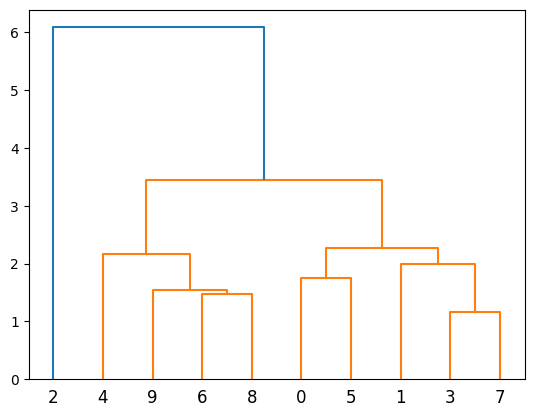

[[ 3.          7.          1.16776141  2.        ]
 [ 6.          8.          1.4744076   2.        ]
 [ 9.         11.          1.54646993  3.        ]
 [ 0.          5.          1.74687666  2.        ]
 [ 1.         10.          1.99897105  3.        ]
 [ 4.         12.          2.16286058  4.        ]
 [13.         14.          2.27794512  5.        ]
 [15.         16.          3.45189526  9.        ]
 [ 2.         17.          6.08959283 10.        ]]


In [30]:
# dendrogram 그리기 (10개)

from scipy.cluster.hierarchy import dendrogram, linkage

link_10 = linkage(basetable_cluster_1.iloc[:10, ], 'ward')
dendrogram(link_10)
plt.show()
print(link_10)

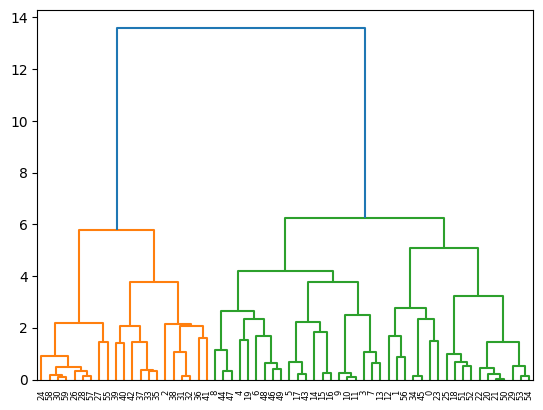

[[21. 50.  0.  2.]
 [30. 59.  0.  2.]
 [10. 11.  0.  2.]
 [53. 54.  0.  2.]
 [28. 57.  0.  2.]]


In [33]:
# dendrogram 그리기 (60개)
link_60 = linkage(basetable_cluster_1.iloc[:60, ], 'ward')
dendrogram(link_60)
plt.show()
print(link_60.round(0)[:5])

In [ ]:
# 예측, 새로운 정보값으로 예측할때 사용
# basetable1['cluster_hier'] 
basetable_cluster_1.iloc[:10, ]

In [38]:
# 타겟값 맵핑 {0:'a', 1:'b', 2:'c'}
basetable1['cluster_hier'] = cluster_1.fit_predict(basetable_cluster_1)

basetable1[:5]

,gender,age,company,grades,salary,expenditure,age_st,salary_st,expenditure_st,gender_F,gender_M,company_A,company_B,company_C,grades_A,grades_B,grades_C,grades_D,grades_F,cluster_hier
0,F,22,A,A,4100,1975,-1.996162,-1.222845,-1.613278,1,0,1,0,0,1,0,0,0,0,2
1,F,31,A,B,4720,2970,-0.954082,-0.887000,-1.077579,1,0,1,0,0,0,1,0,0,0,1
2,F,55,A,B,7280,5905,1.824798,0.499716,0.502599,1,0,1,0,0,0,1,0,0,0,0
3,F,28,B,B,4060,2935,-1.301442,-1.244513,-1.096422,1,0,0,1,0,0,1,0,0,0,2
4,M,29,B,F,4390,4015,-1.185655,-1.065756,-0.514960,0,1,0,1,0,0,0,0,0,1,2


In [35]:
# 타겟값 맵핑 {0:'a', 1:'b', 2:'c'}
basetable1['cluster_hier'] = basetable1['cluster_hier'].map({0:'a', 1:'b', 2:'c'})
basetable1[:5]

,gender,age,company,grades,salary,expenditure,age_st,salary_st,expenditure_st,gender_F,gender_M,company_A,company_B,company_C,grades_A,grades_B,grades_C,grades_D,grades_F,cluster_hier
0,F,22,A,A,4100,1975,-1.996162,-1.222845,-1.613278,1,0,1,0,0,1,0,0,0,0,c
1,F,31,A,B,4720,2970,-0.954082,-0.887000,-1.077579,1,0,1,0,0,0,1,0,0,0,b
2,F,55,A,B,7280,5905,1.824798,0.499716,0.502599,1,0,1,0,0,0,1,0,0,0,a
3,F,28,B,B,4060,2935,-1.301442,-1.244513,-1.096422,1,0,0,1,0,0,1,0,0,0,c
4,M,29,B,F,4390,4015,-1.185655,-1.065756,-0.514960,0,1,0,1,0,0,0,0,0,1,c


In [36]:
pd.crosstab(basetable1['company'], basetable1['cluster_hier'])

cluster_hier,a,b,c
company,,,
A,42,35,23
B,7,53,40
C,31,0,19


### cluster / company에 따른 scatter plot 

Text(0.5, 1.0, 'category : hierarchy cluster')

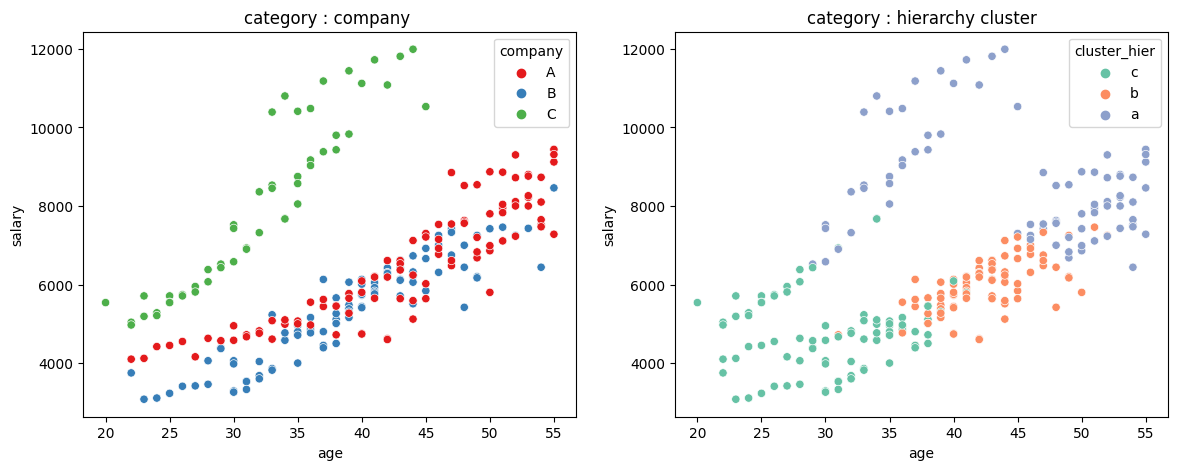

In [37]:
# 회사별 분류 

fig, ax = plt.subplots( nrows= 1 , ncols=2, figsize=(14, 5))
sns.scatterplot(x='age', y='salary', data=basetable1, hue='company',  palette='Set1', ax= ax[0] )
sns.scatterplot(x='age', y='salary', data=basetable1, hue='cluster_hier',  palette='Set2', ax=ax[1] )

ax[0].set_title('category : company ')
ax[1].set_title('category : hierarchy cluster')

hierarchy cluster는 군집 A: 고 연령 / 고 연봉 , 군집 B: 중상 연령, 중저 연봉, 군집 C: 저 연령 / 저 연봉 으로 분류

In [39]:
basetable1.groupby(['cluster_hier'])[['age', 'salary', 'expenditure']].mean()

,age,salary,expenditure
cluster_hier,,,
0,45.112500,8479.375000,7107.500000
1,42.147727,5948.409091,4610.340909
2,30.390244,4726.341463,3275.121951


In [40]:
basetable1.groupby(['cluster_hier'])[['age', 'salary', 'expenditure']].describe()

age                                                       \
             count       mean       std   min    25%   50%    75%   max   
cluster_hier                                                              
0             80.0  45.112500  8.173736  29.0  37.00  48.0  52.00  55.0   
1             88.0  42.147727  3.893820  31.0  39.75  42.0  44.25  52.0   
2             82.0  30.390244  5.122586  20.0  26.00  30.5  34.00  41.0   

             salary               ...                  expenditure  \
              count         mean  ...     75%      max       count   
cluster_hier                      ...                                
0              80.0  8479.375000  ...  9202.5  11990.0        80.0   
1              88.0  5948.409091  ...  6382.5   7460.0        88.0   
2              82.0  4726.341463  ...  5205.0   7670.0        82.0   

                                                                          \
                     mean          std     min      25%     50%      75%   
cluster_hier                                                               
0             7107.500000  1299.693976  4865.0  6271.25  6800.0  7508.75   
1             4610.340909   791.327560  2970.0  4042.50  4742.5  5171.25   
2             3275.121951   875.562597  1330.0  2697.50  3212.5  3878.75   

                       
                  max  
cluster_hier           
0             10865.0  
1              6500.0  
2              5630.0  

[3 rows x 24 columns]

## 1-2. Clustering - K means

age_st, salary_st, expenditure_st, gender, company, grades 각각 더미변수 총 13개 변수를 바탕으로 K-means 군집분석을 시행한다
<br> (sklearn KMeans 진행, n_cluster = 3, random_state=123)

In [41]:
# basetable_cluster_1 (df, age_st, salary_st, expenditure_st, gender, company, grades 각각 더미변수 총 13개 변수)
basetable_cluster_1[:2]

,age_st,salary_st,expenditure_st,gender_F,gender_M,company_A,company_B,company_C,grades_A,grades_B,grades_C,grades_D,grades_F
0,-1.996162,-1.222845,-1.613278,1,0,1,0,0,1,0,0,0,0
1,-0.954082,-0.887000,-1.077579,1,0,1,0,0,0,1,0,0,0


In [42]:
from sklearn.cluster import KMeans

<b><kmeans split 에러시 threadpoolctl 업그레이드 필요> </b>
<br>!pip install threadpoolctl --user --upgrade
<br>import threadpoolctl
<br>threadpoolctl.__version__ <- 3.0 이상 필요 

In [43]:
# K-means 모델 n_clusters=3, random_state=123
cluster_1_2 = KMeans(n_clusters=3, random_state=123).fit(basetable_cluster_1)
cluster_1_2

KMeans(n_clusters=3, random_state=123)

In [44]:
# Attribute 확인
cluster_1_2.inertia_   # 작을수록 좋다, K 증가시 감소

638.8469482817075

In [46]:
#k - means 라벨값 
basetable1['cluster_kmean'] = cluster_1_2.labels_
basetable1[:5]

,gender,age,company,grades,salary,expenditure,age_st,salary_st,expenditure_st,gender_F,...,company_A,company_B,company_C,grades_A,grades_B,grades_C,grades_D,grades_F,cluster_hier,cluster_kmean
0,F,22,A,A,4100,1975,-1.996162,-1.222845,-1.613278,1,...,1,0,0,1,0,0,0,0,2,0
1,F,31,A,B,4720,2970,-0.954082,-0.887000,-1.077579,1,...,1,0,0,0,1,0,0,0,1,0
2,F,55,A,B,7280,5905,1.824798,0.499716,0.502599,1,...,1,0,0,0,1,0,0,0,0,2
3,F,28,B,B,4060,2935,-1.301442,-1.244513,-1.096422,1,...,0,1,0,0,1,0,0,0,2,0
4,M,29,B,F,4390,4015,-1.185655,-1.065756,-0.514960,0,...,0,1,0,0,0,0,0,1,2,0


In [48]:
# crosstab 'cluster_hier' 'cluster_kmean'
pd.crosstab(basetable1['cluster_hier'], basetable1['cluster_kmean'])

cluster_kmean,0,1,2
cluster_hier,,,
0,3,28,49
1,38,0,50
2,81,1,0


In [49]:
# crosstab 'company' 'cluster_kmean'
pd.crosstab(basetable1['company'], basetable1['cluster_kmean'])

cluster_kmean,0,1,2
company,,,
A,36,0,64
B,65,0,35
C,21,29,0


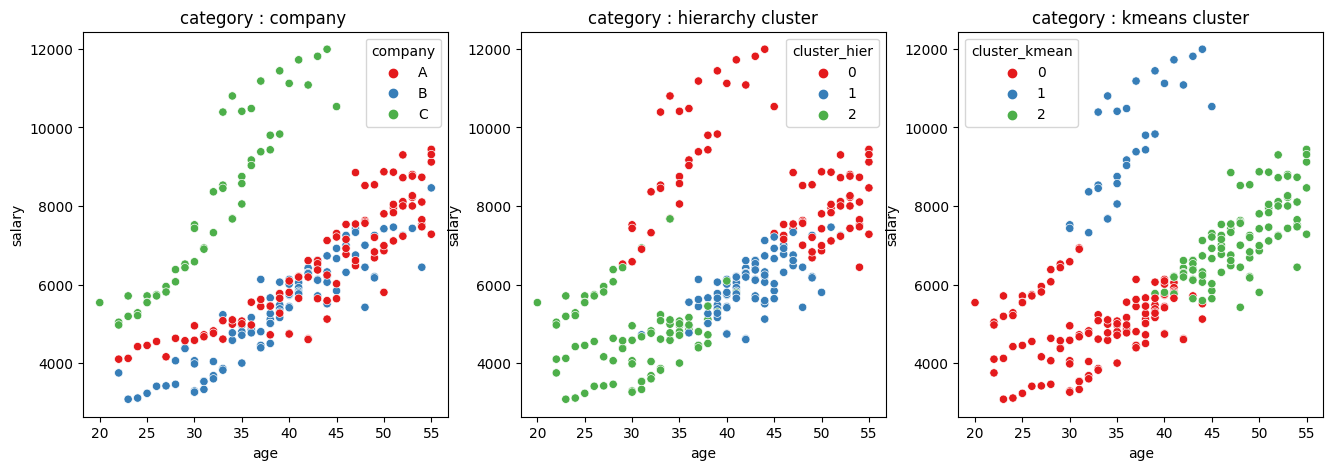

In [50]:
# 회사별 분류 

fig, ax = plt.subplots( nrows= 1 , ncols=3, figsize=(16, 5))
sns.scatterplot(x='age', y='salary', data=basetable1, hue='company',        palette='Set1', ax=ax[0] )
sns.scatterplot(x='age', y='salary', data=basetable1, hue='cluster_hier',   palette='Set1', ax=ax[1] )
sns.scatterplot(x='age', y='salary', data=basetable1, hue='cluster_kmean',  palette='Set1', ax=ax[2] )

ax[0].set_title('category : company ')
ax[1].set_title('category : hierarchy cluster')
ax[2].set_title('category : kmeans cluster')
plt.show()

## 1-4. Clustering 평가 - Elbow score
- kmeans inertia_ 활용

Inertia 값, 군집화후 각 중심점에서 군집의 데이타간 거리를 합산한것으로 응집도를 나타내는 값 

값이 작을 수록 응집도가 높게 군집화가 잘되었다고 평가할 수 있음

In [53]:
# n_clusters=k를 1부터 10까지 적용

inertias = []
mapping = {}
K = range(1, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(basetable_cluster_1) 
    inertias.append(kmeanModel.inertia_)
    mapping[k] = kmeanModel.inertia_
    print('k값 ', k , '=>', kmeanModel.inertia_)
mapping

k값  1 => 1199.5439999999999
k값  2 => 775.9317969906917
k값  3 => 638.7205567342011
k값  4 => 550.6336361198655
k값  5 => 496.6983961171261
k값  6 => 448.40318275437426
k값  7 => 416.0401855791687
k값  8 => 392.87639137561183
k값  9 => 362.7813055036976


{1: 1199.5439999999999,
 2: 775.9317969906917,
 3: 638.7205567342011,
 4: 550.6336361198655,
 5: 496.6983961171261,
 6: 448.40318275437426,
 7: 416.0401855791687,
 8: 392.87639137561183,
 9: 362.7813055036976}

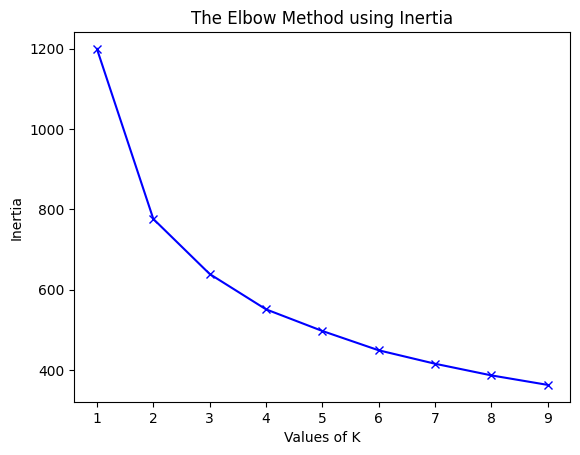

In [52]:
# Elbow score 시각화
plt.plot(np.arange(1, 10), inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

## 1-5. Clustering 평가 - Silhouette Test

silhouette score는 1에 가까워야 positive

In [54]:
from sklearn.metrics import silhouette_score

In [55]:
k_score = pd.DataFrame(columns =['k', 'score'])
for i in np.arange(2, 7):
    model_clustering = KMeans( n_clusters=i, random_state=123).fit(basetable_cluster_1)
    a = silhouette_score( basetable_cluster_1,model_clustering.labels_)
    k = pd.DataFrame({'k':[i], 'score':[a]})
    k_score = pd.concat([k_score, k]).reset_index(drop=True)
    print("K값 ", i, " silhouette score: ", a.round(3) )

K값  2  silhouette score:  0.292
K값  3  silhouette score:  0.278
K값  4  silhouette score:  0.218
K값  5  silhouette score:  0.224
K값  6  silhouette score:  0.236


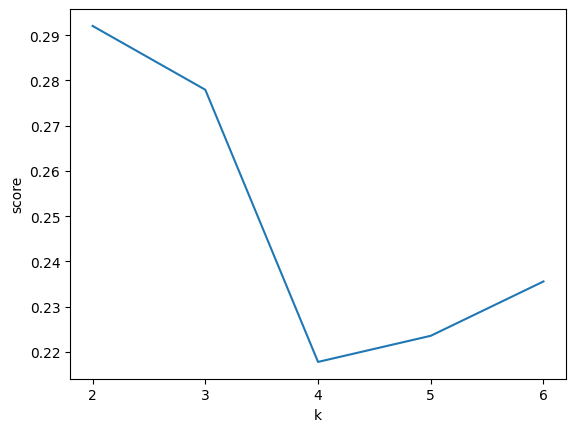

In [56]:
sns.lineplot(x='k', y='score', data=k_score)
plt.xticks([2, 3, 4, 5, 6])
plt.show()

### K 값에 따른 scatter plot

In [57]:
# K값 2~5까지 cluster_model, cluster_label 생성
cluster_model_k1 = KMeans( n_clusters=2, random_state=123).fit(basetable_cluster_1)
cluster_model_k2 = KMeans( n_clusters=3, random_state=123).fit(basetable_cluster_1)
cluster_model_k3 = KMeans( n_clusters=4, random_state=123).fit(basetable_cluster_1)
cluster_model_k4 = KMeans( n_clusters=5, random_state=123).fit(basetable_cluster_1)

cluster_plot = basetable1.copy()
cluster_plot['cluster_k1'] = cluster_model_k1.labels_
cluster_plot['cluster_k2'] = cluster_model_k2.labels_
cluster_plot['cluster_k3'] = cluster_model_k3.labels_
cluster_plot['cluster_k4'] = cluster_model_k4.labels_

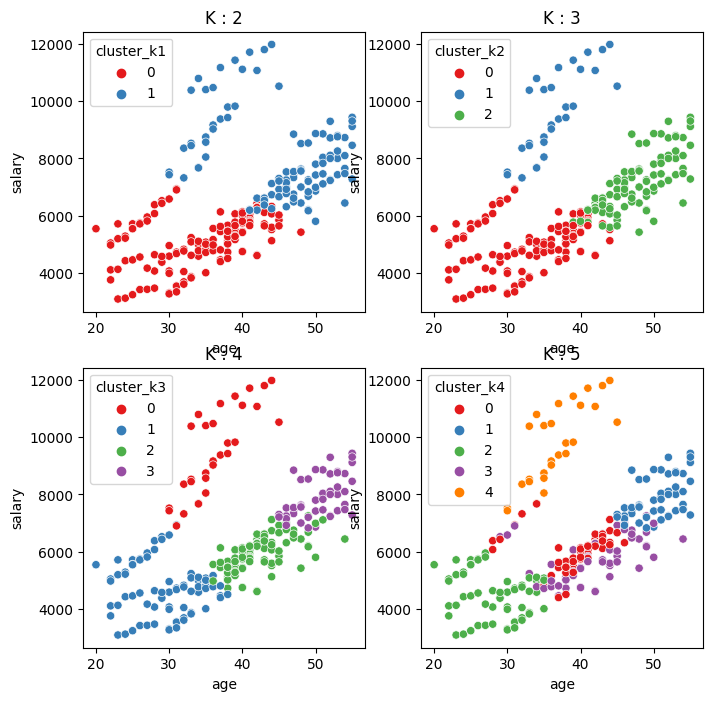

In [58]:
# K별 Plot 

fig, ax = plt.subplots( nrows= 2 , ncols=2, figsize=(8, 8))
sns.scatterplot(x='age', y='salary', data=cluster_plot, hue='cluster_k1',  palette='Set1', ax= ax[0][0] )
sns.scatterplot(x='age', y='salary', data=cluster_plot, hue='cluster_k2',  palette='Set1', ax=ax[0][1] )
sns.scatterplot(x='age', y='salary', data=cluster_plot, hue='cluster_k3',  palette='Set1', ax=ax[1][0] )
sns.scatterplot(x='age', y='salary', data=cluster_plot, hue='cluster_k4',  palette='Set1', ax=ax[1][1] )


ax[0][0].set_title('K : 2')
ax[0][1].set_title('K : 3')
ax[1][0].set_title('K : 4')
ax[1][1].set_title('K : 5')
plt.show()

## 1-6. Clustering 예측

250개 데이터 셋을 바탕으로 군집분석을 실시 하였다.
<br> 250개 외 추가 데이터 셋 샘플을 추가 할 경우, 모델을 바탕으로 기존 군집분석을 바탕으로 Cluster를 분류 할 수 있다. 
<br> 모델은 Kmeans 알고리즘을 통해 3개 cluster로 분류한 cluster_1_2 모델을 활용한다.

<br> 데이터셋 샘플 - 성별:남성 / age:33 / company :C / grades: B / salary : 4500 / expenditure: 2975

<br> <b>작업순서</b>
<br> 1.수치형 변수 표준화 -> 2. 더미변수 확인 -> 3. 데이터 프레임에 맞춰 데이터 셋 준비 -> 4.Cluster 예측 

In [59]:
# basetable1
basetable1.head(3)

,gender,age,company,grades,salary,expenditure,age_st,salary_st,expenditure_st,gender_F,...,company_A,company_B,company_C,grades_A,grades_B,grades_C,grades_D,grades_F,cluster_hier,cluster_kmean
0,F,22,A,A,4100,1975,-1.996162,-1.222845,-1.613278,1,...,1,0,0,1,0,0,0,0,2,0
1,F,31,A,B,4720,2970,-0.954082,-0.887000,-1.077579,1,...,1,0,0,0,1,0,0,0,1,0
2,F,55,A,B,7280,5905,1.824798,0.499716,0.502599,1,...,1,0,0,0,1,0,0,0,0,2


In [60]:
basetable_cluster_1.head(3)

,age_st,salary_st,expenditure_st,gender_F,gender_M,company_A,company_B,company_C,grades_A,grades_B,grades_C,grades_D,grades_F
0,-1.996162,-1.222845,-1.613278,1,0,1,0,0,1,0,0,0,0
1,-0.954082,-0.887000,-1.077579,1,0,1,0,0,0,1,0,0,0
2,1.824798,0.499716,0.502599,1,0,1,0,0,0,1,0,0,0


In [61]:
#sample_1 나이:33, 연봉:4500, 소비액:2975
sample_1 = pd.DataFrame({'age':[33], 'salary':[4500], 'expenditure':[2975]})
sample_1

,age,salary,expenditure
0,33,4500,2975


In [62]:
#기존 표준화 모델 활용
st.transform(sample_1)

array([[-0.72250877, -1.00617084, -1.07488664]])

In [63]:
#sample_1 DataFrame 변경
sample_1_num = pd.DataFrame(st.transform(sample_1), columns=['age_st', 'salary_st', 'expenditure_st'])
sample_1_num

,age_st,salary_st,expenditure_st
0,-0.722509,-1.006171,-1.074887


In [65]:
#dummy DataFrame 생성
sample_1_dummy = pd.DataFrame([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], columns=df_dummy.columns)
sample_1_dummy

,gender_F,gender_M,company_A,company_B,company_C,grades_A,grades_B,grades_C,grades_D,grades_F
0,0,0,0,0,0,0,0,0,0,0


In [66]:
#dummy변수 정보값 생성, 'gender_M', 'company_C', 'grades_B'
sample_1_dummy['gender_M'] = 1
sample_1_dummy['company_C'] = 1
sample_1_dummy['grades_B'] = 1

In [67]:
sample_1_dummy

,gender_F,gender_M,company_A,company_B,company_C,grades_A,grades_B,grades_C,grades_D,grades_F
0,0,1,0,0,1,0,1,0,0,0


In [68]:
# 최종 DataFrame 만들기, sample_1_num,  sample_1_dummy concat
predic_sample1 = pd.concat([sample_1_num, sample_1_dummy], axis=1)
predic_sample1

,age_st,salary_st,expenditure_st,gender_F,gender_M,company_A,company_B,company_C,grades_A,grades_B,grades_C,grades_D,grades_F
0,-0.722509,-1.006171,-1.074887,0,1,0,0,1,0,1,0,0,0


In [69]:
# predic_sample1로 cluster 예측
cluster_1_2.predict(predic_sample1)

array([0])

## Quiz) 추가 예측 

<br> cluster 예측모델로 아래 데이터의 결과를 예측하시오 
<br> 성별:여성 / age:43 / company :B / grades: B / salary : 7900 / expenditure: 6000

In [74]:
# 기존 DataFrame을 사용하여 sample DataFrame 만들기 : to_dict() 활용
basetable_cluster_1[:1].to_dict()

#z표준화
st.transform([[43, 7900, 6000]])

# 추가 정보값 입력


array([[0.43535785, 0.83556143, 0.5537458 ]])

In [77]:
predict_sample2_make = pd.DataFrame({'age_st': {0: 0.43535785},
 'salary_st': {0: 0.83556143},
 'expenditure_st': {0: 0.5537458},
 'gender_F': {0: 1},
 'gender_M': {0: 0},
 'company_A': {0: 0},
 'company_B': {0: 1},
 'company_C': {0: 0},
 'grades_A': {0: 0},
 'grades_B': {0: 1},
 'grades_C': {0: 0},
 'grades_D': {0: 0},
 'grades_F': {0: 0}})

cluster_1_2.predict(predict_sample2_make)

array([2])

In [70]:
# 기존방법
sample_2 = pd.DataFrame({'age':[43], 'salary':[7900], 'expenditure':[6000]})
sample_2_num = pd.DataFrame(st.transform(sample_2), columns = ['age_st', 'salary_st', 'expenditure_st'])
sample_2_dummy = pd.DataFrame([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], columns = df_dummy.columns)
sample_2_dummy['gender_F'][0] = 1
sample_2_dummy['company_B'][0] = 1
sample_2_dummy['grades_B'][0] = 1
predic_sample2 = pd.concat([ sample_2_num, sample_2_dummy], axis=1)

predic_sample2

,age_st,salary_st,expenditure_st,gender_F,gender_M,company_A,company_B,company_C,grades_A,grades_B,grades_C,grades_D,grades_F
0,0.435358,0.835561,0.553746,1,0,0,1,0,0,1,0,0,0


In [78]:
# predic_sample2로 cluster 예측
cluster_1_2.predict(predic_sample2)

array([2])

## 2. $\pi$(파이) 퀴즈 : 붓꽃 데이터 셋 활용 Kmeans / Hierachy 

sklearn 라이브러리 활용을 통한 붓꽃 품종 분류 
<br>
<br> 워밍업: x축을 'sepal_length'으로 y축을 'petal_length'로 scatter plot을 도식화 하시오. 
<br> 이때 라이브러리는 seaborn을 활용하고 'species' 그룹에 따라 색깔을 다르게 표현하시오.

In [79]:
# 파일 로딩 
df_iris = pd.read_csv('.\\data\\iris.csv')

In [80]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [81]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


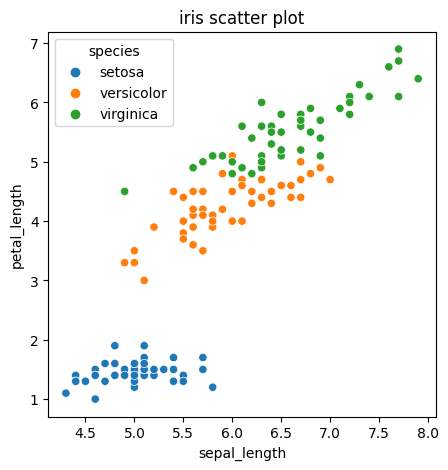

In [82]:
# iris scatter plot, x='sepal_length',  y='petal_length'

fig  = plt.figure( figsize=(5, 5))
sns.scatterplot( data =df_iris, x='sepal_length',  y='petal_length', hue='species')

plt.title('iris scatter plot')
plt.show()

<br> 계층형 군집분석을 통해 3개의 군집으로 분류하고자 한다. 
<br> 수치형 4개 변수 모두 활용해 minmax 정규화를 1차로 수행한 후 
<br> sklearn의 AgglomerativeClustering 메소드를 활용, 하이퍼 파라미터값은 하단을 참조하여 군집분석을 수행하라
<br> (n_clusters=3, affinity='manhattan', linkage='average')
<br>
<br><b> 문제: 3개 클러스터별 'sepal_length' 평균을 확인하고 평균값이 가장 높은 클러스터의 'sepal_length' 평균을 구하라</b>

In [125]:
# MinMaxScaling
from sklearn.preprocessing import MinMaxScaler
sc_iris = MinMaxScaler().fit(df_iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
scd_iris = pd.DataFrame(sc_iris.fit_transform(df_iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]), columns=sc_iris.feature_names_in_)
scd_iris

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [126]:
# AgglomerativeClustering, (n_clusters=3, affinity='manhattan', linkage='average')
cluster_pi = AgglomerativeClustering(n_clusters=3, affinity='manhattan', linkage='average').fit(scd_iris)
scd_iris['cluster'] = cluster_pi.labels_
df_iris = pd.concat([df_iris, scd_iris['cluster']], axis=1)
df_iris[:5]

,sepal_length,sepal_width,petal_length,petal_width,species,cluster,cluster
0,5.1,3.5,1.4,0.2,setosa,1,1
1,4.9,3.0,1.4,0.2,setosa,1,1
2,4.7,3.2,1.3,0.2,setosa,1,1
3,4.6,3.1,1.5,0.2,setosa,1,1
4,5.0,3.6,1.4,0.2,setosa,1,1


In [123]:
cluster_pi.labels_
df_iris = pd.concat([df_iris, scd_iris['cluster']], axis=1)
df_iris[:5]

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [131]:
# pd.crosstab
df_iris = df_iris.iloc[:, :6]  
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,0


<AxesSubplot: xlabel='cluster', ylabel='sepal_width'>

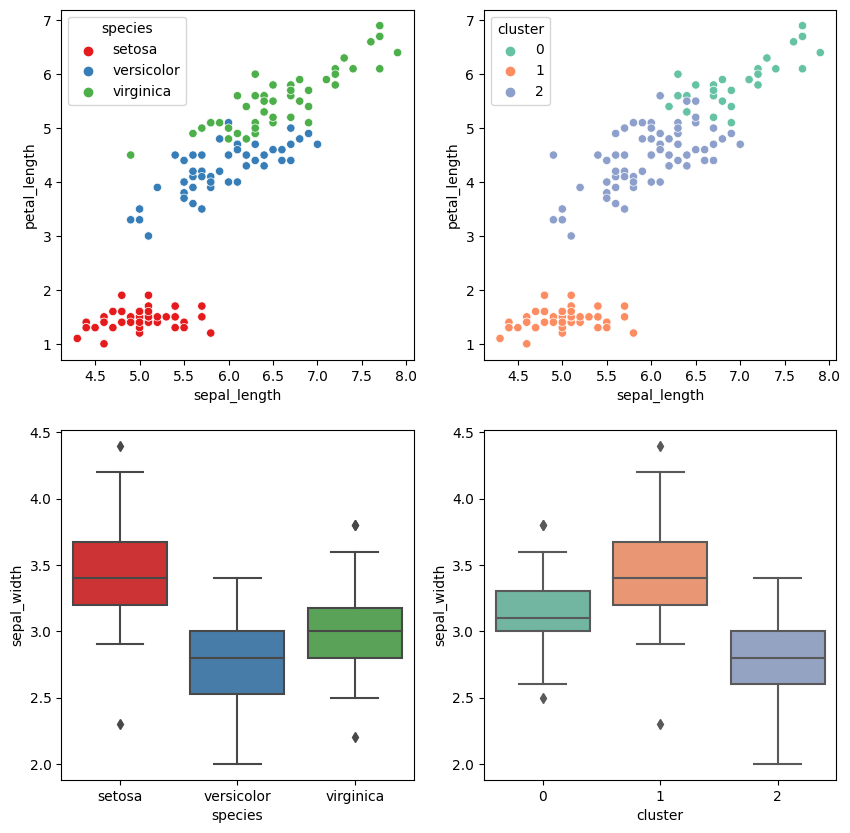

In [132]:
# 시각화
fig, ax = plt.subplots( nrows= 2 , ncols=2,  figsize=(10,10))

sns.scatterplot( data = df_iris, x='sepal_length',  y='petal_length', hue='species' , palette='Set1', ax= ax[0][0])
sns.scatterplot( data = df_iris,  x='sepal_length',  y='petal_length', hue='cluster', palette='Set2',ax= ax[0][1])
sns.boxplot( data = df_iris, x='species', y='sepal_width' , palette='Set1', ax= ax[1][0])
sns.boxplot( data = df_iris, x='cluster', y='sepal_width' , palette='Set2', ax= ax[1][1])

#### (추가) 집단간 sepal_length 평균 차이가 통계적으로 유의미하게 차이 나는지 확인해 보기 

<br> species가 versicolor 인 데이터셋과 이와 유사한 클러스터와 sepal_length 평균 차이 확인해 본다.
<br> shapiro 메소드를 통해 정규성을 확인하고 scipy의 ttest_ind 메소드를 활용할 것 

In [134]:
from scipy.stats import shapiro, ttest_ind

# p-vaue 0.05 이상이면 정규성 만족 
a = df_iris.loc[df_iris['species']=='versicolor', 'sepal_length']
b = df_iris.loc[df_iris['cluster']==2, 'sepal_length']

# shapiro Test, p-vaue 0.05 이상이면 정규성 만족 
print(shapiro(a))
print(shapiro(b))

# 두 집단의 평균의 차이, ttest_ind
print(ttest_ind(a,b))

ShapiroResult(statistic=0.9778357148170471, pvalue=0.4647378921508789)
ShapiroResult(statistic=0.9824140667915344, pvalue=0.4217180013656616)
Ttest_indResult(statistic=-0.4215216515103207, pvalue=0.6741346439118632)


## 3. PCA 

<br> 주성분 분석(Principal Component Analysis, PCA) 가장 널리 사용되는 차원 축소 기법 중 하나
<br> iris 데이터 활용 

In [136]:
#  df 생성
df_iris_2 = df_iris.iloc[:, :4]
df_iris_2

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


<AxesSubplot: xlabel='sepal_length', ylabel='sepal_width'>

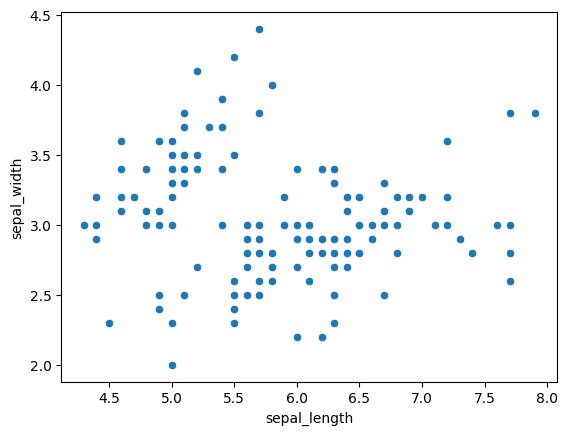

In [138]:
sns.scatterplot(x='sepal_length', y='sepal_width', data=df_iris_2)

In [143]:
#정규화
iris_std = StandardScaler().fit_transform(df_iris_2)
df_iris_std = pd.DataFrame(iris_std, columns=df_iris_2.columns)
df_iris_std

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [146]:
#공분산행렬 확인 
import numpy as np 
cov_matrix = np.cov(df_iris_std.T)

In [147]:
df_iris_std.T

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
sepal_length,-0.900681,-1.143017,-1.385353,-1.506521,-1.021849,-0.537178,-1.506521,-1.021849,-1.748856,-1.143017,...,1.038005,1.280340,-0.052506,1.159173,1.038005,1.038005,0.553333,0.795669,0.432165,0.068662
sepal_width,1.019004,-0.131979,0.328414,0.098217,1.249201,1.939791,0.788808,0.788808,-0.362176,0.098217,...,0.098217,0.098217,-0.822570,0.328414,0.558611,-0.131979,-1.282963,-0.131979,0.788808,-0.131979
petal_length,-1.340227,-1.340227,-1.397064,-1.283389,-1.340227,-1.169714,-1.340227,-1.283389,-1.340227,-1.283389,...,1.046945,0.762758,0.762758,1.217458,1.103783,0.819596,0.705921,0.819596,0.933271,0.762758
petal_width,-1.315444,-1.315444,-1.315444,-1.315444,-1.315444,-1.052180,-1.183812,-1.315444,-1.315444,-1.447076,...,1.580464,1.448832,0.922303,1.448832,1.712096,1.448832,0.922303,1.053935,1.448832,0.790671


In [145]:
cov_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [148]:
##고유값(분산설명력, explained_variance), 고유벡터 추출(사영계수, components)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [149]:
#고유값(분산설명력, explained_variance)
eigenvalues

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [150]:
#고유벡터 추출(사영계수, components)
eigenvectors

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [151]:
pca_iris = pd.DataFrame({'pca1':df_iris_std @ eigenvectors.T[0], 'pca2':df_iris_std @ eigenvectors.T[1], 
                         'pca3':df_iris_std @ eigenvectors.T[2], 'pca4':df_iris_std @ eigenvectors.T[3]})

In [152]:
pca_iris

,pca1,pca2,pca3,pca4
0,-2.264703,-0.480027,-0.127706,0.024168
1,-2.080961,0.674134,-0.234609,0.103007
2,-2.364229,0.341908,0.044201,0.028377
3,-2.299384,0.597395,0.091290,-0.065956
4,-2.389842,-0.646835,0.015738,-0.035923
...,...,...,...,...
145,1.870503,-0.386966,0.256274,0.389257
146,1.564580,0.896687,-0.026371,0.220192
147,1.521170,-0.269069,0.180178,0.119171
148,1.372788,-1.011254,0.933395,0.026129


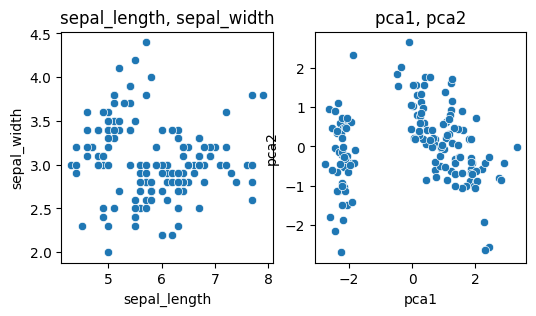

In [155]:
# 시각화 비교 
fig, ax = plt.subplots( nrows= 1 , ncols=2,  figsize=(6,3))

sns.scatterplot(x='sepal_length', y='sepal_width', data=df_iris_2,   ax= ax[0])
sns.scatterplot(x='pca1', y='pca2',                data=pca_iris,    ax= ax[1])

ax[0].set_title('sepal_length, sepal_width')
ax[1].set_title('pca1, pca2')

plt.show()

In [156]:
#PCA 라이브러리 
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA

In [165]:
#고유값(분산설명력, explained_variance), eigenvalues 비교
pc = PCA().fit(df_iris_std)
pc.explained_variance_, eigenvalues

(array([2.93808505, 0.9201649 , 0.14774182, 0.02085386]),
 array([2.93808505, 0.9201649 , 0.14774182, 0.02085386]))

In [171]:
#고유벡터 확인(사영계수, components)
pc.components_, eigenvectors.T

(array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
        [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
        [-0.71956635,  0.24438178,  0.14212637,  0.63427274],
        [-0.26128628,  0.12350962,  0.80144925, -0.52359713]]),
 array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
        [-0.37741762, -0.92329566, -0.02449161, -0.06694199],
        [-0.71956635,  0.24438178,  0.14212637,  0.63427274],
        [ 0.26128628, -0.12350962, -0.80144925,  0.52359713]]))

In [168]:
#pca1
df_iris_std @ pc.components_[0]

0     -2.264703
1     -2.080961
2     -2.364229
3     -2.299384
4     -2.389842
         ...   
145    1.870503
146    1.564580
147    1.521170
148    1.372788
149    0.960656
Length: 150, dtype: float64

In [172]:
# eigenvectors로 계산한것과 비교
pca_iris['pca1']
df_iris_std @ eigenvectors.T[0]

0     -2.264703
1     -2.080961
2     -2.364229
3     -2.299384
4     -2.389842
         ...   
145    1.870503
146    1.564580
147    1.521170
148    1.372788
149    0.960656
Length: 150, dtype: float64

In [ ]:
# transform으로 PCA 계산, df_iris_std @ pc.components_[0]


In [175]:
# 누적 분산 설명력(explained_variance_ratio_)
pc.explained_variance_ratio_.cumsum()

array([0.72962445, 0.95813207, 0.99482129, 1.        ])

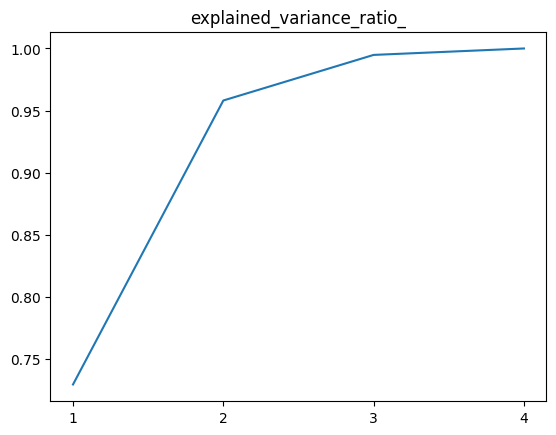

In [173]:
# 누적 분산 설명력(explained_variance_ratio_) 시각화
sns.lineplot(x = [1,2,3,4], y=pc.explained_variance_ratio_.cumsum())
plt.xticks([1,2,3,4])
plt.title('explained_variance_ratio_')
plt.show()

### 콘크리트 데이터 셋 활용, PCA 통해 만든 합성변수로 종속변수 strength을 예측하는 다중 회귀 분석 모델 설계
<br>1030 rows × 9 columns
<br> 라이브러리 : from sklearn.decomposition import PCA

In [176]:
# brick_concrete.csv 파일 로딩
df_brick = pd.read_csv('.\\data\\yellowbrick_concrete.csv')

In [177]:
df_brick

,cement,slag,ash,water,splast,coarse,fine,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [178]:
df_brick.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   cement    1030 non-null   float64
 1   slag      1030 non-null   float64
 2   ash       1030 non-null   float64
 3   water     1030 non-null   float64
 4   splast    1030 non-null   float64
 5   coarse    1030 non-null   float64
 6   fine      1030 non-null   float64
 7   age       1030 non-null   int64  
 8   strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


각 변수별 상관계수 매트릭스 플롯 시각화 

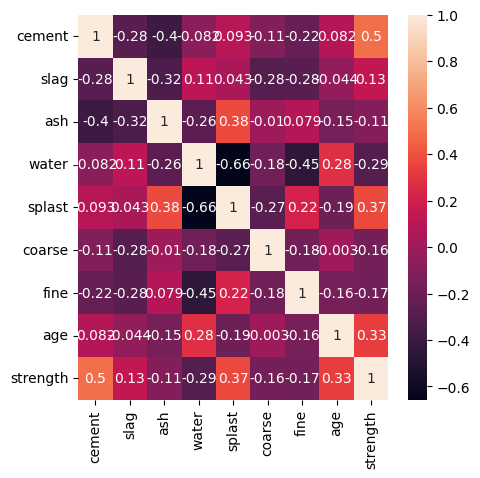

In [179]:
# heatmap
fig = plt.figure( figsize=(5,5))

sns.heatmap( df_brick.corr(), annot=True)
plt.show()

In [180]:
#다중 공선성 VIF 로 feature 특성 파악
# case1

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['features'] = df_brick.columns
vif['VIF'] = [variance_inflation_factor(df_brick.values, i) for i in range(df_brick.shape[1])]
vif.sort_values('VIF', ascending = False)

,features,VIF
3,water,92.512523
5,coarse,85.900013
6,fine,73.522864
0,cement,26.248178
8,strength,14.555916
4,splast,5.520316
2,ash,4.561734
1,slag,4.444466
7,age,2.434882


VIF 지수가 10 초과하는 변수들이 다수 존재 
<br> PCA를 통해 차원 축소, 복잡성을 줄이자!

PCA 프로세스
<br>1.정규화 -> 2. 공분산 행렬 계산 -> 3. 공분산 행렬 고유벡터와 고유값 계산 -> 4. 주성분 구하기

### 1.정규화

In [184]:
# 정규화
sc3 = StandardScaler()
df_brick_sc = pd.DataFrame(sc3.fit_transform(df_brick.drop('strength', axis=1)), columns=df_brick.drop('strength', axis=1).columns)
df_brick_sc

,cement,slag,ash,water,splast,coarse,fine,age
0,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,0.863160,-1.217658,-0.279733
1,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,1.056170,-1.217658,-0.279733
2,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,3.553066
3,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,5.057677
4,-0.790432,0.678414,-0.847132,0.488805,-1.038944,0.070531,0.647908,4.978487
...,...,...,...,...,...,...,...,...
1025,-0.045623,0.488241,0.564569,-0.092122,0.451695,-1.323003,-0.065874,-0.279733
1026,0.392837,-0.856886,0.960095,0.676201,0.702927,-1.994679,0.496916,-0.279733
1027,-1.270057,0.759585,0.850661,0.521599,-0.017270,-1.036061,0.080127,-0.279733
1028,-1.168580,1.308072,-0.847132,-0.279518,0.853666,0.214646,0.191188,-0.279733


### 2. 공분산 행렬 계산 / 3. 공분산 행렬 고유벡터와 고유값 계산
sklearn.decomposition 라이브러리를 통해 자동 추출

In [ ]:
from sklearn.decomposition import PCA

In [185]:
#고유값  
# pd.Series( pca_model.explained_variance_ )
pca_model = PCA(random_state=123).fit(df_brick_sc)
pca_model

PCA(random_state=123)

In [187]:
#고유값 (분산설명력, eigenvalues)
pca_model.explained_variance_

array([2.28210403, 1.41758764, 1.3415455 , 1.01513995, 0.95252658,
       0.79089808, 0.17790128, 0.03007148])

In [186]:
#고유벡터 (사영계수,eigenvector)
pca_model.components_

array([[ 0.09827295,  0.17725317, -0.39464178,  0.54705427, -0.50591697,
         0.03805569, -0.40190575,  0.29152151],
       [-0.11181022,  0.68562442, -0.14379962,  0.0529213 ,  0.28360405,
        -0.63034067, -0.01956876, -0.12567848],
       [ 0.81449534, -0.17340093, -0.40777505, -0.21308433,  0.23419128,
        -0.17256392, -0.00484576,  0.10097873],
       [-0.05437612, -0.36269994,  0.22654071,  0.29601729, -0.03741495,
        -0.5457468 ,  0.38554226,  0.5278852 ],
       [ 0.14788131, -0.02121136,  0.5499439 ,  0.07046483,  0.35441099,
        -0.03310011, -0.7011056 ,  0.22809163],
       [-0.20312941,  0.30495397, -0.18309239, -0.36612798,  0.19324298,
         0.31451971,  0.09236092,  0.74389043],
       [ 0.22208449,  0.22837173,  0.35236521, -0.52417861, -0.66463655,
        -0.22701428, -0.03908382,  0.06925024],
       [ 0.44612725,  0.43735666,  0.38191098,  0.38874361,  0.05176469,
         0.34935768,  0.43337671,  0.01289534]])

### 4. 주성분 구하기

In [193]:
# transform
pca_model.transform(df_brick_sc)
df_brick_tr = pd.DataFrame(pca_model.transform(df_brick_sc), columns=df_brick_sc.columns)
df_brick_tr.columns = ['pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8']
df_brick_tr

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8
0,0.678942,-1.452251,2.391055,-1.352192,0.395663,-0.442858,0.781108,-0.211041
1,0.686287,-1.573914,2.357748,-1.457527,0.389274,-0.382152,0.737292,-0.143611
2,4.155677,0.361971,0.361423,1.474634,1.773968,1.571166,-0.004281,-0.073755
3,4.594304,0.172874,0.513357,2.268896,2.117157,2.690432,0.099914,-0.054353
4,2.363531,-0.276274,-0.276059,2.627950,-0.251961,3.928288,0.418614,0.126414
...,...,...,...,...,...,...,...,...
1025,-0.525081,1.252282,-0.026251,0.458085,0.473144,-0.454480,0.331921,-0.097990
1026,-0.835049,0.748411,0.411132,1.813304,0.554869,-1.418195,-0.177755,-0.018695
1027,-0.184979,1.249837,-1.478085,0.589970,0.208831,-0.386986,0.141915,-0.038484
1028,-0.283681,1.272749,-0.639916,-0.908585,-0.588532,0.935760,-0.755728,-0.183004


### 합성변수의 수는 행 수: 데이터셋 수 / 칼럼 수 : 데이터셋 칼럼 수
데이터셋 칼럼 수 만큼의 합성 변수가 만들어 진다.
<br>(ex: 10개의 칼럼이 있으면 PCA 후 합성변수 수는 총 10개) 

In [ ]:
#합성변수 transform + pca1~8 columns 생성 (1030 rows X 8 columns)
pca_model

PCA 설명력 확인 6개 합성 변수를 통해 90% 이상 설명 가능 하다 

In [191]:
pca_model.explained_variance_ratio_

array([0.28498605, 0.17702642, 0.16753038, 0.1267693 , 0.11895022,
       0.09876628, 0.02221607, 0.00375529])

In [192]:
pca_model.explained_variance_ratio_.cumsum()

array([0.28498605, 0.46201247, 0.62954284, 0.75631214, 0.87526237,
       0.97402864, 0.99624471, 1.        ])

## PCA 절차 정리
1) df

2) sc = StandardScaler().fit_transform(df)

3) PCA().fit(sc) => explained_variance_ , explained_variance_ratio_

4) PCA().fit_transform(sc)

In [194]:
# 1) df (  df_brick_sc_1  )
# 2) sc = StandardScaler().fit_transform(df)
sc = StandardScaler().fit_transform(df_brick.drop('strength', axis=1))
pd.DataFrame(sc)

,0,1,2,3,4,5,6,7
0,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,0.863160,-1.217658,-0.279733
1,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,1.056170,-1.217658,-0.279733
2,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,3.553066
3,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,5.057677
4,-0.790432,0.678414,-0.847132,0.488805,-1.038944,0.070531,0.647908,4.978487
...,...,...,...,...,...,...,...,...
1025,-0.045623,0.488241,0.564569,-0.092122,0.451695,-1.323003,-0.065874,-0.279733
1026,0.392837,-0.856886,0.960095,0.676201,0.702927,-1.994679,0.496916,-0.279733
1027,-1.270057,0.759585,0.850661,0.521599,-0.017270,-1.036061,0.080127,-0.279733
1028,-1.168580,1.308072,-0.847132,-0.279518,0.853666,0.214646,0.191188,-0.279733


In [195]:
# 3) PCA().fit(sc) => explained_variance_ , explained_variance_ratio_
model_pca = PCA(random_state=123).fit(sc)

In [196]:
# 4) PCA().fit_transform(sc)
model_pca.fit_transform(sc)

array([[ 6.78941964e-01, -1.45225131e+00,  2.39105502e+00, ...,
        -4.42857506e-01,  7.81107823e-01, -2.11040520e-01],
       [ 6.86287105e-01, -1.57391354e+00,  2.35774841e+00, ...,
        -3.82151966e-01,  7.37291730e-01, -1.43610894e-01],
       [ 4.15567717e+00,  3.61971069e-01,  3.61423241e-01, ...,
         1.57116607e+00, -4.28108774e-03, -7.37550224e-02],
       ...,
       [-1.84979305e-01,  1.24983669e+00, -1.47808472e+00, ...,
        -3.86986172e-01,  1.41915474e-01, -3.84842698e-02],
       [-2.83680522e-01,  1.27274870e+00, -6.39916181e-01, ...,
         9.35760069e-01, -7.55728286e-01, -1.83003953e-01],
       [ 9.75025197e-02,  1.25751443e+00, -2.48005658e-01, ...,
        -8.45218624e-01, -2.70815831e-01,  3.46210470e-03]])

## 3. $\pi$(파이) 퀴즈 : 아래 회귀분석을 시행하고 평가결과를 비교하시오

 - case 1) 종속변수: df_brick['strength'], 독립변수: df_brick_sc 변수 8개 로 회귀분석
 - case 2) 종속변수: df_brick['strength'], 독립변수: df_brick_sc PCA합성변수 6개 로 회귀분석
 - case 1)과 case 2)의 RMSE를 비교하라

In [ ]:
df_brick_sc[:2]

In [ ]:
df_brick_pca[:2]

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


## 4. Asociation rules

250명의 식료품 구매 이력을 바탕으로 연관성 분석 수행
<br> (file: hkdataset_associaterules.csv - 식료품 데이터셋)
<br> (file: hk_221206.csv - hk_table, 회사원 데이터 셋)

<br> A회사 임직원을 대상으로 연관성 규칙 확인 
<br> 우유를 단일 선행으로 하는 규칙을 만들며 후행 품목 수는 상관없다.    
<br> 이를 위해 A회사 100명의 식료품 구매 이력을 확인하여 A회사 임직원 대상으로 장바구니 분석을 수행한다.
<br> 이때 우유를 선행으로 하는 규칙 중 Lift 값이 가장 높은 item은 무엇인지 확인하시오.
<br> HINT: 식료품 데이터셋과 회사원 데이터셋을 join하여 사용. 
<br> 
<br><b> 관련 라이브러리 및 하이퍼 파라미터 값 </b>
<br> from mlxtend.preprocessing import TransactionEncoder
<br> from mlxtend.frequent_patterns import apriori, association_rules
<br> 조건 min_support=0.1, min_confidence=0.01

Asociation rules 를 위해 mlxtend install 필요

!pip install mlxtend

In [ ]:
# !pip install mlxtend

In [197]:
# 파일 로딩
df_asso = pd.read_csv('.\\data\\hkdataset_associaterules.csv')

In [198]:
df_asso #250명의 식료품 구매 내역 데이터

,id,item
0,hkd1,chocolate
1,hkd1,Corn
2,hkd1,Sugar
3,hkd1,Dill
4,hkd1,Yogurt
...,...,...
1528,hkd250,Butter
1529,hkd250,Milk
1530,hkd250,chocolate
1531,hkd250,Cheese


In [204]:
# 파일 로딩 
df_hk= pd.read_csv('.\\data\\hk_221206.csv')
df_hk

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure
0,hkd1,990623-2,F,161.9,22,A,A,A,4100,1975
1,hkd10,900303-2,F,169.4,31,A,A,B,4720,2970
2,hkd100,681205-2,F,168.3,55,A,A,B,7280,5905
3,hkd101,931226-2,F,155.3,28,AB,B,B,4060,2935
4,hkd102,920123-1,M,188.6,29,O,B,F,4390,4015
...,...,...,...,...,...,...,...,...,...,...
245,hkd95,730710-2,F,157.8,50,A,A,A,6990,4865
246,hkd96,720805-2,F,150.4,51,O,A,A,7110,4985
247,hkd97,710929-1,M,172.4,52,A,A,B,8000,6625
248,hkd98,701024-1,M,166.7,53,O,A,B,8760,7385


In [207]:
# merge (left join)
df_asso = pd.merge(df_asso, df_hk[['name', 'company']], how='left', left_on='id', right_on='name')

In [208]:
df_asso['company'].value_counts()

A    625
B    622
C    286
Name: company, dtype: int64

In [211]:
# A회사 추출
df_asso = df_asso.loc[df_asso['company'] == 'A', :]
df_asso[:5]

,id,item,name,company
0,hkd1,chocolate,hkd1,A
1,hkd1,Corn,hkd1,A
2,hkd1,Sugar,hkd1,A
3,hkd1,Dill,hkd1,A
4,hkd1,Yogurt,hkd1,A


In [216]:
# case 1)
# id별로 item 정리
database3 = df_asso.groupby(['id']).apply(lambda x: x['item'].tolist()).reset_index().rename(columns={0:'item'})
database3

,id,item
0,hkd1,"[chocolate, Corn, Sugar, Dill, Yogurt, Ice cre..."
1,hkd10,"[Apple, Eggs, Dill, Unicorn, Ice cream, Sugar,..."
2,hkd100,"[Bread, Yogurt, Eggs, Butter, Kidney Beans, ch..."
3,hkd11,"[Unicorn, Cheese, Sugar, Ice cream, Bread, Apple]"
4,hkd12,"[Cheese, Yogurt, Nutmeg, chocolate, Kidney Bea..."
...,...,...
95,hkd95,"[Dill, Milk, Nutmeg, Yogurt, Apple, Onion]"
96,hkd96,"[Corn, Dill, Bread, Onion, Milk]"
97,hkd97,"[Dill, Corn, Butter, Yogurt, Kidney Beans, App..."
98,hkd98,[Yogurt]


In [218]:
# import TransactionEncoder, apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

tel = TransactionEncoder()
tel_result = tel.fit(database3['item'])

In [225]:
# TransactionEncoder attribute 확인
tel.columns_

['Apple',
 'Bread',
 'Butter',
 'Cheese',
 'Corn',
 'Dill',
 'Eggs',
 'Ice cream',
 'Kidney Beans',
 'Milk',
 'Nutmeg',
 'Onion',
 'Sugar',
 'Unicorn',
 'Yogurt',
 'chocolate']

In [226]:
# TransactionEncoder attribute 확인
tel.columns_mapping_

{'Apple': 0,
 'Bread': 1,
 'Butter': 2,
 'Cheese': 3,
 'Corn': 4,
 'Dill': 5,
 'Eggs': 6,
 'Ice cream': 7,
 'Kidney Beans': 8,
 'Milk': 9,
 'Nutmeg': 10,
 'Onion': 11,
 'Sugar': 12,
 'Unicorn': 13,
 'Yogurt': 14,
 'chocolate': 15}

In [224]:
tel_result

TransactionEncoder()

In [230]:
# transform
tel_tran = pd.DataFrame(tel.transform(database3['item']), columns=tel.columns_)
tel_tran

,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
1,True,False,False,False,False,True,True,True,False,True,False,True,True,True,False,True
2,False,True,True,True,True,False,True,False,True,True,False,True,True,False,True,True
3,True,True,False,True,False,False,False,True,False,False,False,False,True,True,False,False
4,True,True,False,True,False,True,True,True,True,False,True,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,True,False,False,False,False,True,False,False,False,True,True,True,False,False,True,False
96,False,True,False,False,True,True,False,False,False,True,False,True,False,False,False,False
97,True,False,True,False,True,True,False,False,True,False,True,False,False,False,True,False
98,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [234]:
# apriori
apri1 = apriori(tel_tran, min_support=0.1, use_colnames=True)
apri1

,support,itemsets
0,0.43,(Apple)
1,0.43,(Bread)
2,0.35,(Butter)
3,0.35,(Cheese)
4,0.34,(Corn)
...,...,...
325,0.11,"(Bread, Dill, Yogurt, chocolate)"
326,0.10,"(Nutmeg, Yogurt, Corn, chocolate)"
327,0.10,"(Yogurt, Corn, chocolate, Onion)"
328,0.10,"(Yogurt, Dill, Ice cream, chocolate)"


In [240]:
# association_rules
asso1 = association_rules(apri1, metric='confidence', min_threshold=0.5)
asso1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Corn),(Apple),0.34,0.43,0.18,0.529412,1.231190,0.0338,1.211250
1,(Nutmeg),(Apple),0.37,0.43,0.19,0.513514,1.194217,0.0309,1.171667
2,(Sugar),(Apple),0.37,0.43,0.19,0.513514,1.194217,0.0309,1.171667
3,(Apple),(Yogurt),0.43,0.49,0.22,0.511628,1.044139,0.0093,1.044286
4,(Apple),(chocolate),0.43,0.48,0.23,0.534884,1.114341,0.0236,1.118000
...,...,...,...,...,...,...,...,...,...
564,"(Nutmeg, Yogurt, chocolate)",(Dill),0.14,0.41,0.10,0.714286,1.742160,0.0426,2.065000
565,"(Nutmeg, Dill, chocolate)",(Yogurt),0.12,0.49,0.10,0.833333,1.700680,0.0412,3.060000
566,"(Yogurt, Dill, chocolate)",(Nutmeg),0.17,0.37,0.10,0.588235,1.589825,0.0371,1.530000
567,"(Nutmeg, Dill)","(Yogurt, chocolate)",0.18,0.27,0.10,0.555556,2.057613,0.0514,1.642500


우유를 사는 고객은 후행으로 어떤 상품을 많이 사는지 lift 내림차순으로 정렬 

In [241]:
asso1['antecedents'].values[:10]

array([frozenset({'Corn'}), frozenset({'Nutmeg'}), frozenset({'Sugar'}),
       frozenset({'Apple'}), frozenset({'Apple'}), frozenset({'Butter'}),
       frozenset({'Cheese'}), frozenset({'Corn'}), frozenset({'Dill'}),
       frozenset({'Eggs'})], dtype=object)

In [244]:
asso1[asso1['antecedents'] == frozenset({'Milk'})].sort_values('lift', ascending=False).round(2)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
27,(Milk),(Corn),0.37,0.34,0.20,0.54,1.59,0.07,1.44
34,(Milk),(Dill),0.37,0.41,0.22,0.59,1.45,0.07,1.46
10,(Milk),(Bread),0.37,0.43,0.19,0.51,1.19,0.03,1.17
51,(Milk),(chocolate),0.37,0.48,0.21,0.57,1.18,0.03,1.20
50,(Milk),(Yogurt),0.37,0.49,0.20,0.54,1.10,0.02,1.11


정답 : Corn(lift: 1.59) 

In [247]:
# case 2
df_asso['cnt'] = True
df_asso[:5]

,id,item,name,company,cnt
0,hkd1,chocolate,hkd1,A,True
1,hkd1,Corn,hkd1,A,True
2,hkd1,Sugar,hkd1,A,True
3,hkd1,Dill,hkd1,A,True
4,hkd1,Yogurt,hkd1,A,True


In [253]:
# pivot_table 생성
df_pivot = pd.pivot_table(data=df_asso,
                          values='cnt',
                          index='id',
                          columns='item',
                          aggfunc='max',
                          fill_value=False,)

In [254]:
# apriori
from mlxtend.frequent_patterns import apriori, association_rules
apri2 = apriori(df_pivot, min_support=0.1, use_colnames=True)
apri2

,support,itemsets
0,0.43,(Apple)
1,0.43,(Bread)
2,0.35,(Butter)
3,0.35,(Cheese)
4,0.34,(Corn)
...,...,...
325,0.11,"(Bread, Dill, Yogurt, chocolate)"
326,0.10,"(Nutmeg, Yogurt, Corn, chocolate)"
327,0.10,"(Yogurt, Corn, chocolate, Onion)"
328,0.10,"(Yogurt, Dill, Ice cream, chocolate)"


In [255]:
# association_rules
asso2 = association_rules(apri2, metric='confidence', min_threshold=0.5)
asso2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Corn),(Apple),0.34,0.43,0.18,0.529412,1.231190,0.0338,1.211250
1,(Nutmeg),(Apple),0.37,0.43,0.19,0.513514,1.194217,0.0309,1.171667
2,(Sugar),(Apple),0.37,0.43,0.19,0.513514,1.194217,0.0309,1.171667
3,(Apple),(Yogurt),0.43,0.49,0.22,0.511628,1.044139,0.0093,1.044286
4,(Apple),(chocolate),0.43,0.48,0.23,0.534884,1.114341,0.0236,1.118000
...,...,...,...,...,...,...,...,...,...
564,"(Nutmeg, Yogurt, chocolate)",(Dill),0.14,0.41,0.10,0.714286,1.742160,0.0426,2.065000
565,"(Nutmeg, Dill, chocolate)",(Yogurt),0.12,0.49,0.10,0.833333,1.700680,0.0412,3.060000
566,"(Yogurt, Dill, chocolate)",(Nutmeg),0.17,0.37,0.10,0.588235,1.589825,0.0371,1.530000
567,"(Nutmeg, Dill)","(Yogurt, chocolate)",0.18,0.27,0.10,0.555556,2.057613,0.0514,1.642500


## $\Omega$(오메가) Quiz1 (연관규칙을 생성하고 아래에 답하시오)

Mart (association_rules_mart.csv) 데이터셋 활용 
<br>40,000 rows X 3 columns

<br>1. 한 번에 2개를 구매한 것은 삭제하시오. (ID와 Item이 중복되는것)
<br>hint: drop_duplicates (34,766 rows)
<br>2. 연관성 규칙을 생성하시오 (min_support=0.005, min_threshold=0.005)
<br>3. 선행(antecedents)이 단일 Item 인것을 대상으로 데이터 셋을 구성하시오
<br>4. support가 0.01보다 큰 것중(>= 0.01) lift가 가장 높은 선행, 후행 Item을 고르시오

In [256]:
# case1) pivot 사용
# 파일 로딩
df_mart = pd.read_csv('.\\data\\association_rules_mart.csv')
df_mart

,Date,ID,Item
0,2014-01-01,1249in804,citrus fruit
1,2014-01-01,1249in804,coffee
2,2014-01-01,1381ht273,curd
3,2014-01-01,1381ht273,soda
4,2014-01-01,1440kn258,other vegetables
...,...,...,...
39995,2016-12-27,4222fp614,cat food
39996,2016-12-27,1324ja040,misc. beverages
39997,2016-12-27,3641wn936,frozen meals
39998,2016-12-28,4719rj024,whole milk


In [262]:
# step1) drop_duplicates
df_mart.drop_duplicates(subset=['ID', 'Item'])
df_mart[:5]

,Date,ID,Item,cnt
0,2014-01-01,1249in804,citrus fruit,True
1,2014-01-01,1249in804,coffee,True
2,2014-01-01,1381ht273,curd,True
3,2014-01-01,1381ht273,soda,True
4,2014-01-01,1440kn258,other vegetables,True


In [264]:
df_mart.value_counts()

Date        ID         Item               cnt 
2015-03-11  1994qa114  whole milk         True    4
2015-11-03  4829px058  yogurt             True    3
2014-02-08  3518fo163  whole milk         True    3
2015-12-27  2061mb679  tropical fruit     True    3
2015-02-27  1648bg592  rolls/buns         True    3
                                                 ..
2014-09-23  3384xx032  rolls/buns         True    1
                       seasonal products  True    1
            3649fy481  pip fruit          True    1
                       rolls/buns         True    1
2016-12-28  4719rj024  whole milk         True    1
Length: 39241, dtype: int64

In [265]:
df_mart2 = df_mart.copy()

In [267]:
df_mart[:5]

,Date,ID,Item,cnt
0,2014-01-01,1249in804,citrus fruit,True
1,2014-01-01,1249in804,coffee,True
2,2014-01-01,1381ht273,curd,True
3,2014-01-01,1381ht273,soda,True
4,2014-01-01,1440kn258,other vegetables,True


In [266]:
# step2) min_support=0.005, min_threshold=0.005
from mlxtend.frequent_patterns import apriori, association_rules

df_mart['cnt'] = True
mart_pivot = df_mart.pivot_table(values='cnt', index='ID', columns='Item', aggfunc='max', fill_value='False')
mart_pivot

Item,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
ID,,,,,,,,,,,,,,,,,,,,,
1000ol738,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1001sf480,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,True,False,True,False,False
1002nj599,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1003cq947,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1004jh583,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996wm646,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4997lv130,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
4998pn964,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [277]:
# apriori
mart_apri = apriori(df_pivot, min_support=0.005, use_colnames=True).sort_values('support', ascending=False)
mart_apri

,support,itemsets
14,0.49,(Yogurt)
15,0.48,(chocolate)
1,0.43,(Bread)
0,0.43,(Apple)
5,0.41,(Dill)
...,...,...
12659,0.01,"(Milk, Corn, Apple, Ice cream, Butter, Yogurt,..."
12660,0.01,"(Corn, Apple, Ice cream, Butter, Nutmeg, Onion..."
12661,0.01,"(Corn, Sugar, Apple, Ice cream, Butter, Nutmeg..."
12662,0.01,"(Corn, Apple, Unicorn, Ice cream, Butter, Nutm..."


In [290]:
# association_rules
mart_asso = association_rules(mart_apri, metric='confidence', min_threshold=0.005)

In [291]:
# step3) antecedents이 단일 Item 추출
mart_asso_1 = mart_asso['antecedents'].apply(lambda x: len(x) == 1)

In [292]:
mart_asso_1

0           True
1           True
2           True
3           True
4           True
           ...  
2520876    False
2520877    False
2520878    False
2520879    False
2520880    False
Name: antecedents, Length: 2520881, dtype: bool

In [295]:
# step4) support가 0.01 보다 큰 것중 lift가 가장 높은 선행과 후행을 고르시오
mart_asso_1[mart_asso_1['support'] > 0.01].sort_values('lift', ascending=False)

KeyError: 'support'

In [286]:
# case 2) transactionencoder 사용
# 파일 로딩
df_mart_2 = pd.read_csv('.\\data\\association_rules_mart.csv')
df_mart_2

,Date,ID,Item
0,2014-01-01,1249in804,citrus fruit
1,2014-01-01,1249in804,coffee
2,2014-01-01,1381ht273,curd
3,2014-01-01,1381ht273,soda
4,2014-01-01,1440kn258,other vegetables
...,...,...,...
39995,2016-12-27,4222fp614,cat food
39996,2016-12-27,1324ja040,misc. beverages
39997,2016-12-27,3641wn936,frozen meals
39998,2016-12-28,4719rj024,whole milk


In [ ]:
# step1) drop_duplicates
df_mart_2.drop_duplicates(subset=['ID', 'Item'])

In [ ]:
# step2) min_support=0.005, min_threshold=0.005
# step2) transactionencoding

from mlxtend.preprocessing import transactionencoder
from mlxtend.frequent_patterns import apriori, association_rules


In [ ]:
# apriori,  association_rules


In [ ]:
# step3) antecedents이 단일 Item 추출


In [ ]:
# step4) support가 0.01 보다 큰 것중 lift가 가장 높은 선행과 후행을 고르시오


## $\Omega$(오메가) Quiz2 (연관규칙을 생성하고 아래에 답하시오)

seaborn 라이브러리 택시 데이터셋 활용 
<br>6433 rows × 14 columns

<br> 당신은 미국 맨하탄에 공유자동차 서비스를 기획하고자 한다. 
<br> 프로토타입으로 Upper East Side North에서 출발하는 가장 가능성이 높은 공유 노선을 설정하고자 한다. 
<br> 이를 위해 아래 단계를 거쳐 연관성 분석을 수행한다. 
<br> 1. 결측치 제거 후 진행 
<br> 2. 택시 데이터 셋을 바탕으로 색상은 노랑색(yellow)에 맨허튼에서 픽업을 한 택시로 필터링한 데이터를 바탕으로 분석을 진행한다. 
<br> 3. pickup_zone/ dropoff_zone 칼럼을 이용하여 파생변수('rules')를 생성한다. ([pickup_zone, dropoff_zone] 형식)
<br> ex) pickup_zone = 'A', dropoff_zone = 'B' 일때 [A, B]로 생성
     hint) 
<br> 4. from mlxtend.preprocessing import TransactionEncoder를 바탕으로 연관성 분석 전처리 데이터셋을 만들고
<br> 5. 연관성 분석을 실행하시오 (최소 기준 support =0.001, confidence = 0.1)
<br>  5-1. lift가 가장 높은 선행, 후행 구간을 구하시오
<br>  5-2. Bloomingdale가 선행일때 lift 값이 가장 높은 후행을 찾으시오

In [ ]:
# case1) TransactionEncoder 활용
# step1 파일로딩, 결측치 제거,


In [ ]:
# step2 yellow & Manhattan 필터링


In [ ]:
# step3  pickup_zone, dropoff_zone 파생변수 ('rules')

In [ ]:
# quiz3['rules'] = [ [quiz3['pickup_zone'][i]] + [quiz3['dropoff_zone'][i]] for i in range(quiz3.shape[0]) ]


In [ ]:
# quiz3[['pickup_zone','dropoff_zone']]


In [ ]:
# step4. TransactionEncoder로 연관성 분석 전처리 데이터셋 생성


In [ ]:
# te3.columns_


In [ ]:
# step5) apriori, min_support=0.001


In [ ]:
# step 5-1) association_rules 도출, lift 분석


In [ ]:
# step 5-2) Bloomingdale가 선행일때 lift 값이 가장 높은 후행


In [ ]:
# -------------------

In [ ]:
# case2) pivot_table 활용
# step1 파일로딩, 결측치 제거,


In [ ]:
# step2 yellow & Manhattan 필터링


In [ ]:
# step3  pickup_zone, dropoff_zone 파생변수 ('rules')

In [ ]:
# quiz3_1['rules'] = [ [quiz3_1['pickup_zone'][i]] + [quiz3_1['dropoff_zone'][i]] for i in range(quiz3_1.shape[0]) ] 


In [ ]:
# quiz3_1 = quiz3_1.reset_index()


In [ ]:
# step4. 연관성 분석 전처리 데이터셋 생성
from mlxtend.frequent_patterns import apriori, association_rules

- pandas.DataFrame.melt

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.melt.html?highlight=melt

In [ ]:
# pivot_table 생성
quiz3_1_1 = quiz3_1.reset_index()
quiz3_1_1_melt = quiz3_1_1.melt(id_vars='index',     value_vars=['pickup_zone','dropoff_zone'],     var_name=None,    value_name='value')


In [ ]:
# step5 apriori, min_support=0.001


In [ ]:
# step 5-1) association_rules 도출, lift 분석


In [ ]:
# step 5-2) Bloomingdale가 선행일때 lift 값이 가장 높은 후행


##  $\Sigma$ (시그마) Quiz ( 다이아몬드를 군집화하고 평균 가격을 분석하시오)

https://www.kaggle.com/datasets/shivam2503/diamonds

데이터(diamonds.csv) 사이즈 : 53940 X 10
<br> 
<br> <b>carat:</b> weight of the diamond (0.2--5.01)
<br> <b>cut:</b> quality of the cut (Fair, Good, Very Good, Premium, Ideal)
<br> <b>color:</b> diamond colour, from D (best) to J (worst)
<br> <b>clarity:</b> a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
<br> <b>depth:</b> total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
<br> <b>table:</b> width of top of diamond relative to widest point (43--95) 
<br> <b>price:</b> price in US dollars ($326--$18,823)
<br> <b>x:</b> length in mm (0--10.74)
<br> <b>y:</b> width in mm (0--58.9)
<br> <b>z:</b> depth in mm (0--31.8)

<br>

### quiz 1) diamond 데이터셋에 PCA를 적용하여 feature수를 줄이시오

<br> 가장 값이 많이 나가는 다이아몬드 군집모형을 만들고자 한다. 

<br> 먼저 다이아몬드 데이터셋 중 carat은 0.7이상 0.8이하 데이터샘플만을 바탕으로한다. 
<br> 해당 데이터 셋의 모든 수치형 데이터를 활용하여 PCA를 진행한다(종속변수로 활용할 price는 제외)
<br> 이때 분산설명력이 높은 순으로 확인할 시 누적 분산 설명력 90% 이상 확인할때 합성변수는 모두 몇개가 필요한가? 

<br> 이와 함께 위에서 확인한 변수 수를 바탕으로 PCA 합성변수로만 이루어진 데이터 셋을 만들고 데이터셋 명칭을 
<br> quiz_table1 로 명명한다.

In [ ]:
# 파일 로딩
quiz1 = pd.read_csv('.\\data\\diamonds.csv')

In [ ]:
# carat이 0.7이상~0.8이하 샘플만 확인


In [ ]:
# 수치형 변수 추출 


In [ ]:
# PCA


In [ ]:
# 분산설명력 확인, 90% 이상


In [ ]:
# quiz_table 생성

### quiz 2) diamond 데이터셋 - 계층형 군집 분석 후 모델 적합 

<br>quiz_table1과 함께 이전 데이터셋에서의 모든 명목형 변수는 더미변수 처리(drop_first=True)하여 열결합을 수행한다.
<br>이후 계층형 군집분석을 아래 옵션값을 확인하여 진행한다.
<br>(메소드: AgglomerativeClustering, 클러스터 수 = 4, affinity='euclidean', linkage='ward')
<br>클러스터별 다이아몬드 값 평균을 확인하고 평균값이 가장 높은 클러스터의 다이아몬드 평균값을 구하시오 

In [ ]:
# dummy 변수 생성


In [ ]:
# price, pca table, dummy table 결합


In [ ]:
# AgglomerativeClustering (n_clusters=4, affinity='euclidean', linkage='ward')


In [ ]:
# 평균가격이 가장 높은 cluster은 ?


### quiz 3) 클러스터별 평균 차이가 실제 유의미한 차이가 있는지 ANOVA 분석 및 pairwise_tukeyhsd 사후 분석 수행 

In [ ]:
# f_oneway ANOVA 분석


In [ ]:
# 분석결과 확인


In [ ]:
# clarity: (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))


In [ ]:
# cut: (Fair, Good, Very Good, Premium, Ideal)


In [ ]:
# color: diamond colour, from D (best) to J (worst)
